In this notebook we will use the nn class **Sequential** to model a CNN

We will use the single target network

# Import

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

from sklearn.model_selection import KFold

from tqdm import tqdm

import load_script
from params import *
from custom_layers import *
from training import *

from utilities import *
from parse_dataset import *

In [2]:
%load_ext autoreload
%autoreload 2

# Loading the dataset

In [3]:
folder=Dataset(base_directory='/Users/savare/DeepLearning/',dataset='eeg')

Reading data from /Users/savare/DeepLearning/EEG//
Reading data from /Users/savare/DeepLearning/EEG//__pycache__//
Reading data from /Users/savare/DeepLearning/EEG//data//
Reading data from /Users/savare/DeepLearning/EEG//stefano//
Reading data from /Users/savare/DeepLearning/EEG//stefano//__pycache__//
Reading data from /Users/savare/DeepLearning/EEG//stefano//notebook//
Reading data from /Users/savare/DeepLearning/EEG//stored//


In [4]:
# train_dataset,train_target=load_script.load_dataset_1000hz(train=True)

In [5]:
# test_dataset,test_target=load_script.load_dataset_1000hz(train=False)

In [6]:
train_dataset,train_target=load_script.load_dataset(train=True)

In [7]:
test_dataset,test_target=load_script.load_dataset(train=False)

# Normalization

In [8]:
train_dataset.shape

torch.Size([316, 28, 50])

In [9]:
test_dataset.shape

torch.Size([100, 28, 50])

In [10]:
mean=train_dataset.mean(0).view(1,28,50)
std=train_dataset.std(0).view(1,28,50)

In [11]:
train_dataset=(train_dataset-mean)/std
test_dataset=(test_dataset-mean)/std

# Defining the network

### Simple Network

In [12]:
class SingleLayer(nn.Module):
    
    num_my_conv_layers=1
    num_linear_layers=2
    
    def __init__(self,params):
        super(SingleLayer,self).__init__()
        
        self.params=params
        
        layers=[]
        for i in range(self.num_my_conv_layers): 
            layers+=MyConv1D(*self.params[i]).layers
        
        layers.append(Flatten())
        layers.append(nn.Linear(*self.params[self.num_my_conv_layers]))
        layers.append(nn.ReLU())
        
        layers.append(nn.Linear(*self.params[self.num_my_conv_layers+1]))
        
        self.sequential=nn.Sequential(*layers)
        
    def forward(self,x):
        x=self.sequential(x)
        
        return x

In [13]:
class DoubleLayer(nn.Module):
    
    num_my_conv_layers=2
    num_linear_layers=2
    
    def __init__(self,params):
        super(SingleLayer,self).__init__()
        
        self.params=params
        
        layers=[]
        for i in range(self.num_my_conv_layers): 
            layers+=MyConv1D(*self.params[i]).layers
        
        layers.append(Flatten())
        layers.append(nn.Linear(*self.params[self.num_my_conv_layers]))
        layers.append(nn.ReLU())
        
        layers.append(nn.Linear(*self.params[self.num_my_conv_layers+1]))
        
        self.sequential=nn.Sequential(*layers)
        
    def forward(self,x):
        x=self.sequential(x)
        
        return x

In [14]:
class ThreeLayers(nn.Module):
    
    num_my_conv_layers=3
    num_linear_layers=2
    
    def __init__(self,params):
        super(ThreeLayers,self).__init__()
        
        self.params=params
        
        layers=[]
        for i in range(self.num_my_conv_layers): 
            layers+=MyConv1D(*self.params[i]).layers
        
        layers.append(Flatten())
        layers.append(nn.Linear(*self.params[self.num_my_conv_layers]))
        layers.append(nn.ReLU())
        
        layers.append(nn.Linear(*self.params[self.num_my_conv_layers+1]))
        
        self.sequential=nn.Sequential(*layers)
        
    def forward(self,x):
        x=self.sequential(x)
        
        return x

In [15]:
class ThreeLayers2D(nn.Module):
    
    num_my_conv_layers=3
    num_linear_layers=2
    
    def __init__(self,params):
        super(ThreeLayers2D,self).__init__()
        
        self.params=params
        
        layers=[]
        layers.append(Tensor4D())
        for i in range(self.num_my_conv_layers): 
            layers+=MyConv2D(*self.params[i]).layers
        layers.append(Flatten())
        layers.append(nn.Linear(*self.params[self.num_my_conv_layers]))
        layers.append(nn.ReLU())
        layers.append(nn.Linear(*self.params[self.num_my_conv_layers+1]))
        
        self.sequential=nn.Sequential(*layers)
        
    def forward(self,x):
        x=self.sequential(x)
        
        return x
    

# Training

In [16]:
?nn.Conv2D

Object `nn.Conv2D` not found.



  0%|          | 2/400 [00:00<00:21, 18.15it/s]

Dropout 0
Network:

[28, 28, 3, 0, True]
[1344, 200]
[200, 2]

Repetition 0



100%|██████████| 400/400 [00:13<00:00, 29.18it/s]


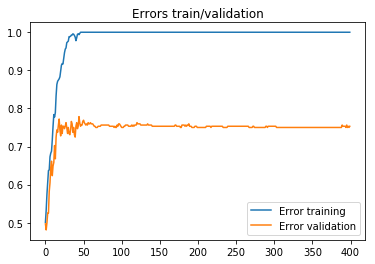

  1%|          | 3/400 [00:00<00:16, 24.40it/s]

Performance train: 1.0
Performance validation: 0.750411392405
Dropout 0.1
Network:

[28, 28, 3, 0.1, True]
[1344, 200]
[200, 2]

Repetition 0


100%|██████████| 400/400 [00:16<00:00, 24.92it/s]


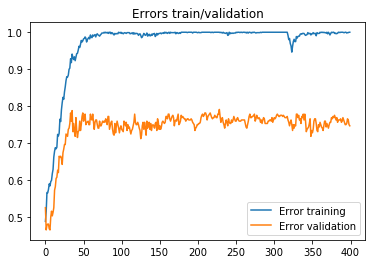

  1%|          | 3/400 [00:00<00:17, 22.87it/s]

Performance train: 0.994799578059
Performance validation: 0.75835443038
Dropout 0.2
Network:

[28, 28, 3, 0.2, True]
[1344, 200]
[200, 2]

Repetition 0


100%|██████████| 400/400 [00:15<00:00, 25.19it/s]


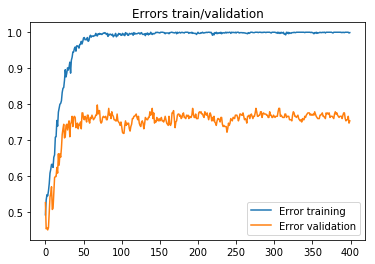

  1%|          | 3/400 [00:00<00:16, 23.69it/s]

Performance train: 0.999113924051
Performance validation: 0.766234177215
Dropout 0.3
Network:

[28, 28, 3, 0.3, True]
[1344, 200]
[200, 2]

Repetition 0


100%|██████████| 400/400 [00:15<00:00, 25.29it/s]


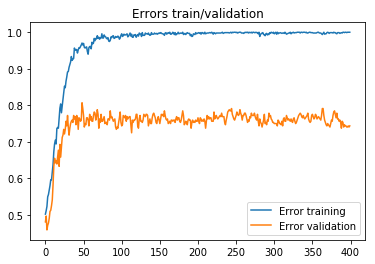

  0%|          | 0/400 [00:00<?, ?it/s]

Performance train: 0.998417721519
Performance validation: 0.75996835443
Dropout 0.4
Network:

[28, 28, 3, 0.4, True]
[1344, 200]
[200, 2]

Repetition 0


100%|██████████| 400/400 [00:16<00:00, 24.69it/s]


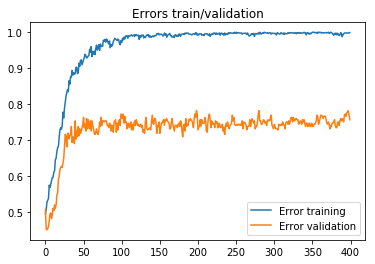

  1%|          | 3/400 [00:00<00:16, 23.43it/s]

Performance train: 0.99723628692
Performance validation: 0.750284810127
Dropout 0.5
Network:

[28, 28, 3, 0.5, True]
[1344, 200]
[200, 2]

Repetition 0


100%|██████████| 400/400 [00:16<00:00, 24.99it/s]


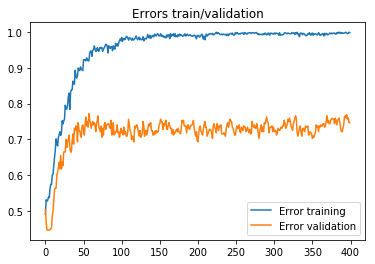

  0%|          | 1/400 [00:00<00:54,  7.37it/s]

Performance train: 0.995833333333
Performance validation: 0.737594936709
Dropout 0.6
Network:

[28, 28, 3, 0.6, True]
[1344, 200]
[200, 2]

Repetition 0


100%|██████████| 400/400 [00:16<00:00, 24.53it/s]


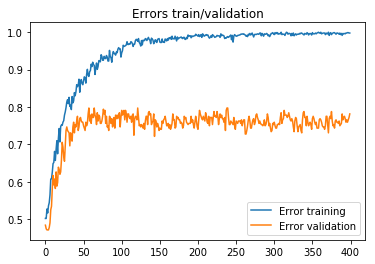

  0%|          | 2/400 [00:00<00:22, 17.82it/s]

Performance train: 0.996297468354
Performance validation: 0.761202531646
Dropout 0.7
Network:

[28, 28, 3, 0.7, True]
[1344, 200]
[200, 2]

Repetition 0


100%|██████████| 400/400 [00:16<00:00, 24.94it/s]


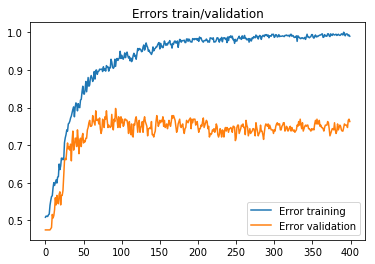

  1%|          | 3/400 [00:00<00:16, 23.74it/s]

Performance train: 0.990369198312
Performance validation: 0.748291139241
Dropout 0.8
Network:

[28, 28, 3, 0.8, True]
[1344, 200]
[200, 2]

Repetition 0


100%|██████████| 400/400 [00:16<00:00, 23.66it/s]


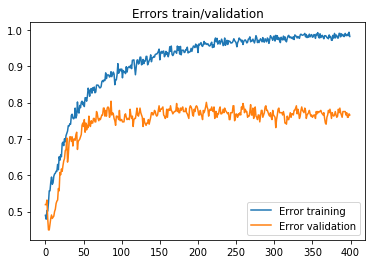

  1%|          | 3/400 [00:00<00:15, 25.37it/s]

Performance train: 0.981708860759
Performance validation: 0.767943037975
Dropout 0.9
Network:

[28, 28, 3, 0.9, True]
[1344, 200]
[200, 2]

Repetition 0


100%|██████████| 400/400 [00:16<00:00, 24.91it/s]


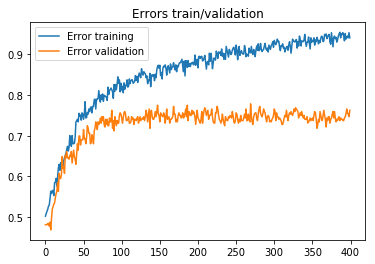

Performance train: 0.933523206751
Performance validation: 0.746455696203


In [18]:
dropout_values=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
results=[]
for dropout in dropout_values:
    print('Dropout',dropout)
    cv=CrossValidation(k=4,train_dataset=train_dataset,test_dataset=test_dataset,
                   train_target=train_target,test_target=test_target)
    
    net_type=SingleLayer
    optimizer_type=optim.Adam
    criterion_type=nn.CrossEntropyLoss
    network_params=NetworkParams(conv_filters=[28],conv_kernels=[3],
                                 linear_filters=[200,2],
                                 dropout_rate=dropout,batch_norm=True,conv1D=True)
    optimizer_params=OptimizerParams()
    train_params=TrainParams(max_epoch=400,mini_batch_size=79)


    params=Params(net_type,optimizer_type,criterion_type,network_params=network_params,
                  optimizer_params=optimizer_params,train_params=train_params,)

    cv(params,repetitions=1,cross_validation=True,repetitions_test=0)
    results.append(cv.result)

In [20]:
results={}

In [19]:
file_name=folder.stored+'single_layer'
write_pickle(results,file_name)

In [ ]:
cv=CrossValidation(k=2,train_dataset=train_dataset,test_dataset=test_dataset,
                   train_target=train_target,test_target=test_target)

net_type=ThreeLayers2D
optimizer_type=optim.Adam
criterion_type=nn.CrossEntropyLoss
network_params=NetworkParams(conv_filters=[28,28,28],conv_kernels=[(3,1),(5,3),(3,3)],
                             linear_filters=[200,2],
                             dropout_rate=0,batch_norm=False,conv1D=False)
optimizer_params=OptimizerParams()
train_params=TrainParams(max_epoch=100,mini_batch_size=79)


params=Params(net_type,optimizer_type,criterion_type,network_params=network_params,
              optimizer_params=optimizer_params,train_params=train_params,)

cv(params)

In [ ]:
net_type=ThreeLayers
optimizer_type=optim.Adam
criterion_type=nn.CrossEntropyLoss
network_params=NetworkParams(linear_filters=[200,2],dropout_rate=0)
optimizer_params=OptimizerParams()
train_params=TrainParams(max_epoch=100)


params=Params(net_type,optimizer_type,criterion_type,network_params=network_params,
              optimizer_params=optimizer_params,train_params=train_params,)

train=Train(train_dataset=train_dataset,test_dataset=test_dataset,
            train_target=train_target,test_target=test_target)
train(params)